In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import oocgcm.filtering.timefilters as tf
import dask.array as da
import pylab as plt
import importlib
import xarray as xr

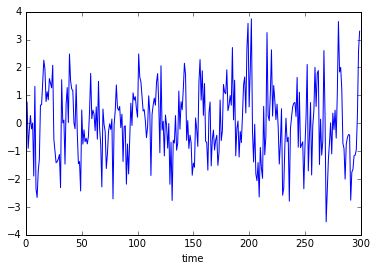

In [2]:
# Generate a sinusoid with a period of 20 yr overimposed on a rednoise
A = 1
T = 20
n = 300
time = np.arange(300)
data = tf.rednoise(0.1, n) + A * np.cos(2 * np.pi / T * time)
data2 = xr.DataArray(data, coords=[time], dims=['time'])
signal = data2.chunk(chunks={'time':100})
signal.plot()

<xarray.Window 'lanczos' (time: 11)>
array([ 0.0143955 ,  0.04945316,  0.08798734,  0.12290652,  0.14726045,
        0.15599407,  0.14726045,  0.12290652,  0.08798734,  0.04945316,
        0.0143955 ])
Coordinates:
  * time     (time) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5


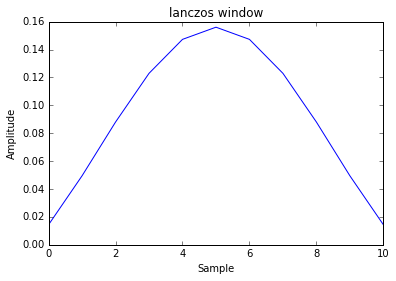

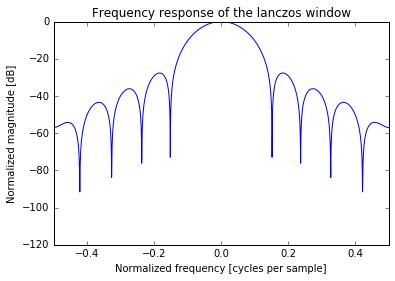

In [3]:
win_lcz = tf.Window('lanczos', n=[5], dims=['time'], fc=0.02)
print win_lcz
win_lcz.plot()

In [4]:
signal_lf = win_lcz.convolve(signal)

Coordinates:
  * time     (time) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5
{0: 5}


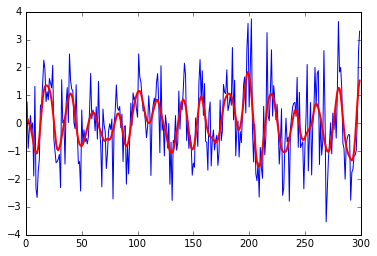

In [5]:
plt.plot(signal, lw=1)
plt.plot(signal_lf, lw=2, color='r')

<xarray.Window 'boxcar' (time: 11)>
array([ 0.09090909,  0.09090909,  0.09090909,  0.09090909,  0.09090909,
        0.09090909,  0.09090909,  0.09090909,  0.09090909,  0.09090909,
        0.09090909])
Coordinates:
  * time     (time) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5


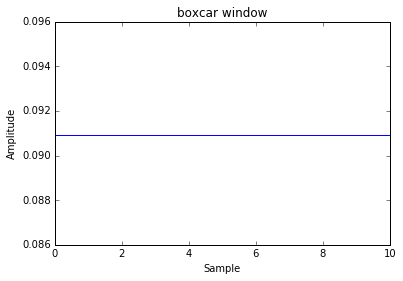

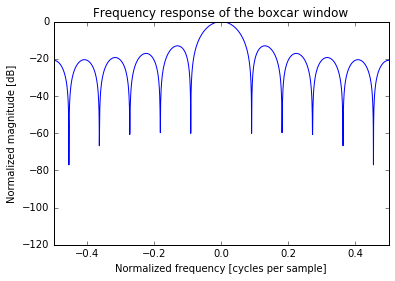

In [6]:
win_box = tf.Window('boxcar', n=[5], dims=['time'])
print win_box
win_box.plot()

In [7]:
signal = data2.chunk(chunks={'time':100})
signal_lf = win_box.convolve(signal)

Coordinates:
  * time     (time) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5
{0: 5}


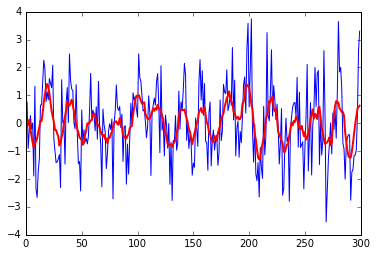

In [8]:
plt.plot(signal, lw=1)
plt.plot(signal_lf, lw=2, color='r')

<xarray.Window 'tukey' (time: 11)>
array([ 0.        ,  0.04606553,  0.12060113,  0.13333333,  0.13333333,
        0.13333333,  0.13333333,  0.13333333,  0.12060113,  0.04606553,  0.        ])
Coordinates:
  * time     (time) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5


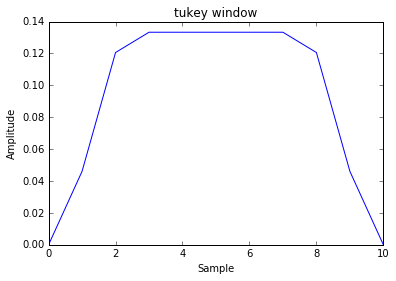

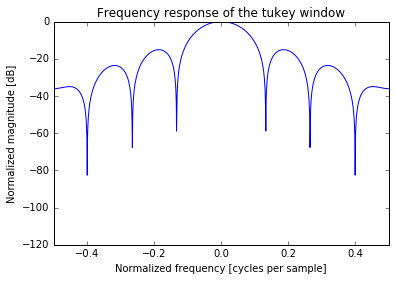

In [9]:
win_tukey = tf.Window('tukey', n=[5], dims=['time'])
print win_tukey
win_tukey.plot()

In [10]:
signal = data2.chunk(chunks={'time':100})
signal_lf = win_tukey.convolve(signal)

Coordinates:
  * time     (time) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5
{0: 5}


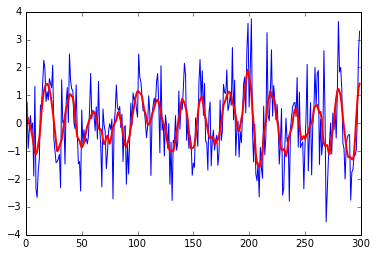

In [11]:
plt.plot(signal, lw=1)
plt.plot(signal_lf, lw=2, color='r')

<xarray.Window 'hanning' (time: 11)>
array([ 0.       ,  0.0190983,  0.0690983,  0.1309017,  0.1809017,
        0.2      ,  0.1809017,  0.1309017,  0.0690983,  0.0190983,  0.       ])
Coordinates:
  * time     (time) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5


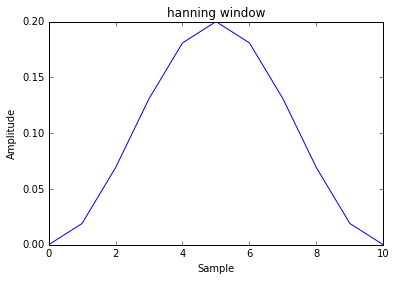

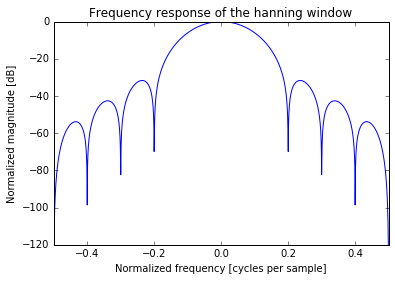

In [14]:
win_han = tf.Window('hanning', n=[5], dims=['time'])
print win_han
win_han.plot()

In [15]:
signal = data2.chunk(chunks={'time':100})
signal_lf = win_han.convolve(signal)

Coordinates:
  * time     (time) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5
{0: 5}


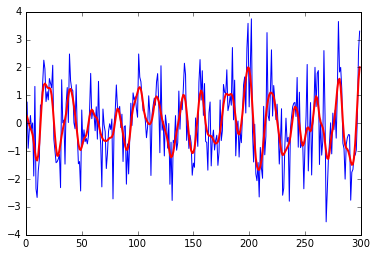

In [16]:
plt.plot(signal, lw=1)
plt.plot(signal_lf, lw=2, color='r')